In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

In [81]:
data = pd.read_csv('train.csv')

In [82]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [83]:
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,24.785217,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,24.785217,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,24.785217,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,24.785217,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,24.785217,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [84]:
data.tail(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99990,155616,34304,7,Sarah McBridec,28.0,31350942.0,Architect,20002.88,1929.906667,10.0,...,Bad,3571.70,25.123535,74.0,Yes,60.964772,34.662906,Low_spent_Large_value_payments,228.750392,Standard
99991,155617,34304,8,Sarah McBridec,29.0,31350942.0,Architect,20002.88,1929.906667,10.0,...,Bad,3571.70,37.140784,75.0,Yes,60.964772,34.662906,High_spent_Large_value_payments,337.362988,Standard
99992,155622,37932,1,Nicks,24.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,32.991333,375.0,No,35.104023,24.028477,Low_spent_Small_value_payments,189.641080,Poor
99993,155623,37932,2,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,29.135447,376.0,No,35.104023,24.028477,Low_spent_Medium_value_payments,400.104466,Standard
99994,155624,37932,3,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,39.323569,377.0,No,35.104023,24.028477,High_spent_Medium_value_payments,410.256158,Poor
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard
99999,155629,37932,8,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.192463,382.0,No,35.104023,24.028477,High_spent_Large_value_payments,393.673696,Poor


In [85]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [86]:
# Remove column name 
data = data.drop(columns=['Total_EMI_per_month'])

In [87]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [89]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [91]:
data['Monthly_Inhand_Salary'].value_counts()

6769.130000    16
4387.272500    16
2295.058333    16
6639.560000    16
3080.555000    16
               ..
1211.935000     1
2592.248483     1
4767.722500     1
3002.973195     1
4427.498453     1
Name: Monthly_Inhand_Salary, Length: 13235, dtype: int64

In [92]:
data['Num_Bank_Accounts'].value_counts()

6.0     13179
7.0     12992
8.0     12944
4.0     12344
5.0     12299
3.0     12105
9.0      5502
10.0     5338
1.0      4541
0.0      4416
2.0      4340
Name: Num_Bank_Accounts, dtype: int64

In [93]:
data['Num_Credit_Card'].value_counts()

5.0     18905
7.0     17024
6.0     16931
4.0     14359
3.0     13560
8.0      5075
10.0     4964
9.0      4751
2.0      2196
1.0      2186
11.0       36
0.0        13
Name: Num_Credit_Card, dtype: int64

In [94]:
data['Interest_Rate'].value_counts()

8.0     5104
5.0     5096
6.0     4832
12.0    4648
10.0    4616
7.0     4584
9.0     4576
11.0    4512
18.0    4192
15.0    4072
20.0    4008
17.0    3888
16.0    3800
19.0    3704
3.0     2824
1.0     2744
4.0     2640
2.0     2520
13.0    2432
14.0    2272
32.0    1776
22.0    1752
24.0    1736
30.0    1728
23.0    1720
29.0    1696
28.0    1648
27.0    1640
25.0    1608
21.0    1592
34.0    1528
26.0    1528
33.0    1496
31.0    1488
Name: Interest_Rate, dtype: int64

In [95]:
data['Num_of_Loan'].value_counts()

3.0    15752
2.0    15712
4.0    15456
0.0    11408
1.0    11128
6.0     8144
7.0     7680
5.0     7528
9.0     3856
8.0     3336
Name: Num_of_Loan, dtype: int64

In [96]:
data['Type_of_Loan'].value_counts()

no data                                                                                                                     11408
not specified                                                                                                                1408
credit-builder loan                                                                                                          1280
personal loan                                                                                                                1272
debt consolidation loan                                                                                                      1264
                                                                                                                            ...  
not specified,mortgage loan,auto loan,payday loan                                                                               8
payday loan,mortgage loan,debt consolidation loan,student loan                            

In [97]:
data['Delay_from_due_date'].value_counts()

15.0    3596
13.0    3424
8.0     3324
14.0    3313
10.0    3281
        ... 
59.0     528
39.0     525
43.0     502
46.0     490
37.0     490
Name: Delay_from_due_date, Length: 63, dtype: int64

In [98]:
data['Num_of_Delayed_Payment'].value_counts()

19.0    5967
17.0    5831
10.0    5813
16.0    5780
15.0    5711
18.0    5669
20.0    5570
12.0    5504
9.0     5410
8.0     5294
11.0    5259
14.0    4502
13.0    4335
21.0    2723
7.0     2537
6.0     2493
22.0    2491
5.0     2267
23.0    2183
0.0     2086
3.0     2075
2.0     2073
1.0     2045
4.0     1983
25.0    1853
24.0    1843
26.0     322
27.0     250
28.0     131
Name: Num_of_Delayed_Payment, dtype: int64

In [99]:
data['Changed_Credit_Limit'].value_counts()

 8.22     137
 11.50    128
 11.32    127
 10.06    124
 7.35     123
         ... 
-2.85       1
 29.44      1
-4.14       1
 24.56      1
 21.17      1
Name: Changed_Credit_Limit, Length: 4107, dtype: int64

In [100]:
data['Num_Credit_Inquiries'].value_counts()

4.0     11745
3.0      9213
6.0      8390
2.0      8370
7.0      8356
8.0      8132
1.0      7853
0.0      7245
5.0      5891
9.0      5478
11.0     5256
10.0     5124
12.0     4729
13.0     1529
14.0     1080
15.0      839
16.0      474
17.0      296
Name: Num_Credit_Inquiries, dtype: int64

In [101]:
data['Credit_Mix'].value_counts()

Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

In [102]:
data['Credit_Utilization_Ratio'].value_counts()

26.822620    1
28.327949    1
30.016576    1
25.478841    1
33.933755    1
            ..
30.687138    1
38.730069    1
30.017515    1
27.279794    1
34.192463    1
Name: Credit_Utilization_Ratio, Length: 100000, dtype: int64

In [103]:
data['Credit_History_Age'].value_counts()

232.0    488
191.0    486
190.0    483
233.0    483
215.0    483
        ... 
3.0       21
403.0     18
2.0       15
404.0     12
1.0        2
Name: Credit_History_Age, Length: 404, dtype: int64

In [104]:
data['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [105]:
data['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      28964
High_spent_Medium_value_payments    18666
High_spent_Large_value_payments     14982
Low_spent_Medium_value_payments     14620
High_spent_Small_value_payments     11917
Low_spent_Large_value_payments      10851
Name: Payment_Behaviour, dtype: int64

In [106]:
data['Monthly_Balance'].value_counts()

1183.930696    8
1014.173394    8
372.873822     8
236.241829     8
1040.212843    7
              ..
351.988912     1
271.948092     1
311.152393     1
338.560341     1
393.673696     1
Name: Monthly_Balance, Length: 98068, dtype: int64

In [107]:

data['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [108]:
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.311180,5.004617e+08,50505.123449,4198.350924,5.368750,5.533680,14.53208,3.532880,21.081420,13.324800,10.384983,5.778590,1426.220376,32.285173,221.207040,64.503471,394.017932
std,43301.486619,14340.543051,2.291299,10.764783,2.908267e+08,38299.422093,3187.402015,2.593095,2.067126,8.74133,2.446356,14.804237,6.269772,6.732201,3.861341,1155.129026,5.116875,99.679734,48.007734,201.689576
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,-5.010000,0.000000,0.230000,20.000000,1.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.761667,3.000000,4.000000,7.00000,2.000000,10.000000,9.000000,5.340000,3.000000,566.072500,28.052567,144.000000,32.524401,268.190628
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.978333,5.000000,5.000000,13.00000,3.000000,18.000000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,51.511546,334.515040
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5961.637500,7.000000,7.000000,20.00000,5.000000,28.000000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,82.087065,464.580996
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,10.000000,11.000000,34.00000,9.000000,62.000000,28.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,510.726237,1183.930696


In [109]:
data.min()

ID                                                     5634
Customer_ID                                            1006
Month                                                     1
Name                                     A. Ananthalakshmih
Age                                                    14.0
SSN                                                 81349.0
Occupation                                       Accountant
Annual_Income                                       7005.93
Monthly_Inhand_Salary                            303.645417
Num_Bank_Accounts                                       0.0
Num_Credit_Card                                         0.0
Interest_Rate                                           1.0
Num_of_Loan                                             0.0
Type_of_Loan                                      auto loan
Delay_from_due_date                                     0.0
Num_of_Delayed_Payment                                  0.0
Changed_Credit_Limit                    

In [110]:
data.max()

ID                                                                     155629
Customer_ID                                                             50999
Month                                                                       8
Name                                                                       yv
Age                                                                      56.0
SSN                                                               999993421.0
Occupation                                                             Writer
Annual_Income                                                       179987.28
Monthly_Inhand_Salary                                            15204.633333
Num_Bank_Accounts                                                        10.0
Num_Credit_Card                                                          11.0
Interest_Rate                                                            34.0
Num_of_Loan                                                     

In [111]:
data.isna()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [112]:

data.Interest_Rate.sort_values()

89230     1.0
16637     1.0
16636     1.0
16635     1.0
16634     1.0
         ... 
37439    34.0
37438    34.0
37437    34.0
38431    34.0
49999    34.0
Name: Interest_Rate, Length: 100000, dtype: float64

In [113]:
X=data.drop("Credit_Score",axis=1)
y=data["Credit_Score"]

numeric=X.select_dtypes(exclude="object").columns
categorical=['Payment_of_Min_Amount', 'Credit_Mix']

low_cardinality=[col for col in numeric if data[col].nunique()<=30]
high_cardinality=[col for col in numeric if data[col].nunique()>30]

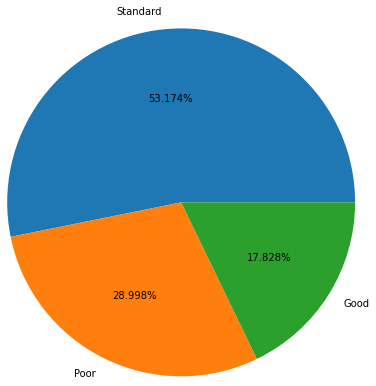

In [114]:
ser=data["Credit_Score"].value_counts()
plt.pie(x=ser.values, labels=ser.index, autopct="%0.3f%%", radius=2);


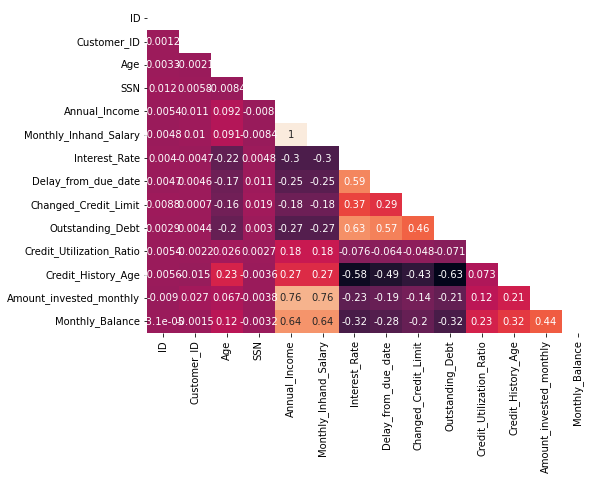

In [115]:
plt.figure(figsize=(8, 6))
arr=np.ones_like(data[high_cardinality].corr())
mask=np.triu(arr)
sns.heatmap(data[high_cardinality].corr(), cbar=False, annot=True, fmt=".2g", mask=mask);


In [116]:
col=["Credit_Mix", "Payment_of_Min_Amount", "Payment_Behaviour", "Type_of_Loan"]

In [117]:
data["Credit_Mix"].value_counts()

Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

In [118]:
data.Payment_Behaviour.unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

<AxesSubplot:>

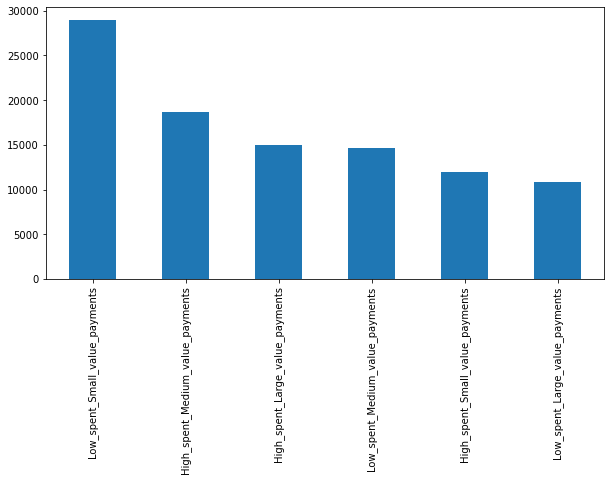

In [119]:
plt.figure(figsize=(10,5))
data['Payment_Behaviour'].value_counts().plot(kind='bar')

<AxesSubplot:>

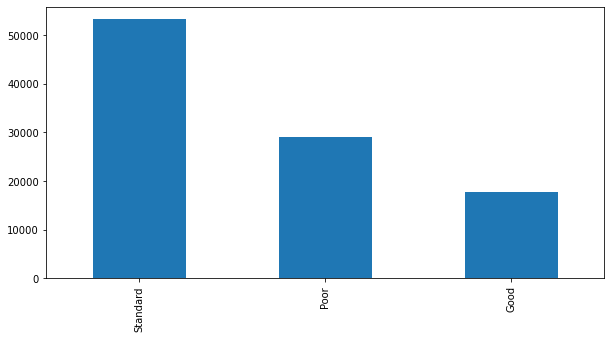

In [120]:

plt.figure(figsize=(10,5))
data['Credit_Score'].value_counts().plot(kind='bar')

e:\Users\work\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

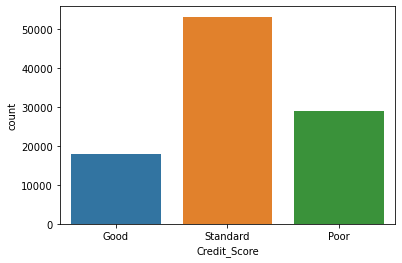

In [121]:

sns.countplot(data['Credit_Score'])
data['Credit_Score'].value_counts()

<AxesSubplot:>

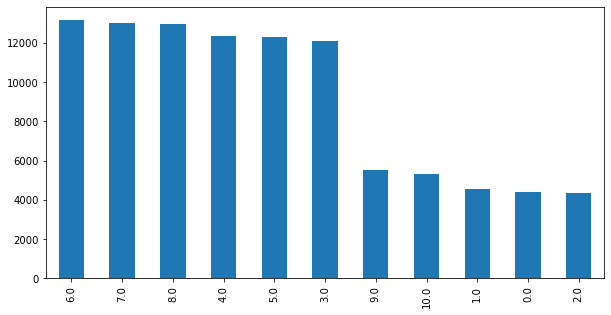

In [122]:
plt.figure(figsize=(10,5))
data['Num_Bank_Accounts'].value_counts().plot(kind='bar')


<AxesSubplot:>

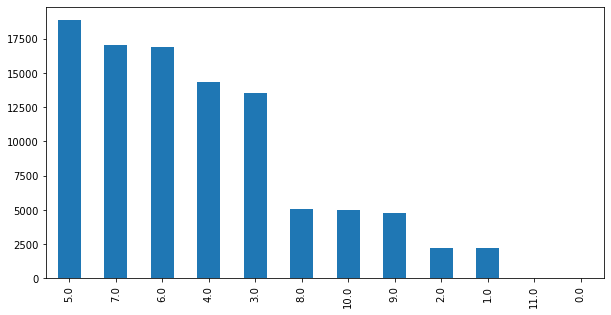

In [123]:

plt.figure(figsize=(10,5))
data['Num_Credit_Card'].value_counts().plot(kind='bar')

<AxesSubplot:>

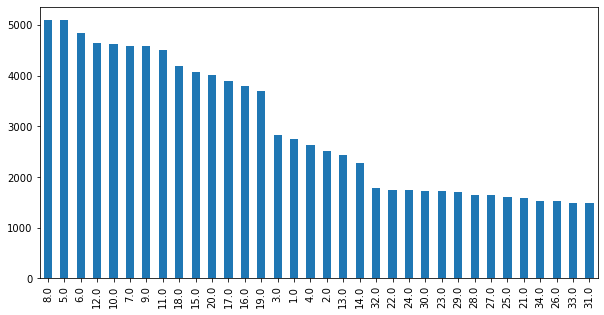

In [124]:
plt.figure(figsize=(10,5))
data['Interest_Rate'].value_counts().plot(kind='bar')

<AxesSubplot:>

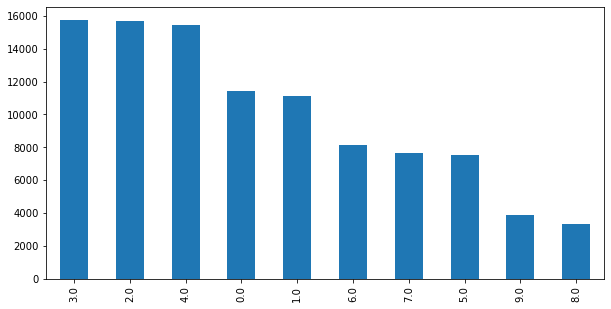

In [125]:
plt.figure(figsize=(10,5))
data['Num_of_Loan'].value_counts().plot(kind='bar')

<AxesSubplot:>

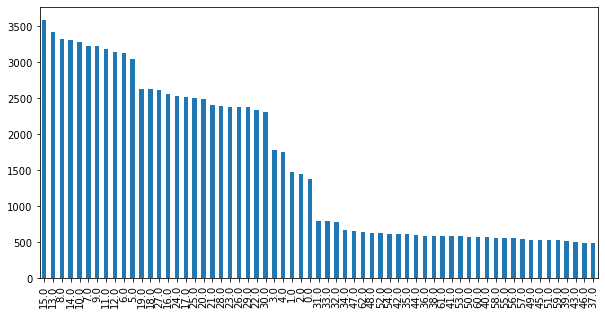

In [126]:
plt.figure(figsize=(10,5))
data['Delay_from_due_date'].value_counts().plot(kind='bar')

<AxesSubplot:>

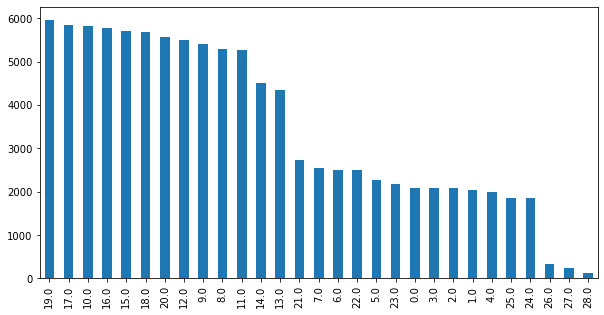

In [127]:
plt.figure(figsize=(10,5))
data['Num_of_Delayed_Payment'].value_counts().plot(kind='bar')

<AxesSubplot:>

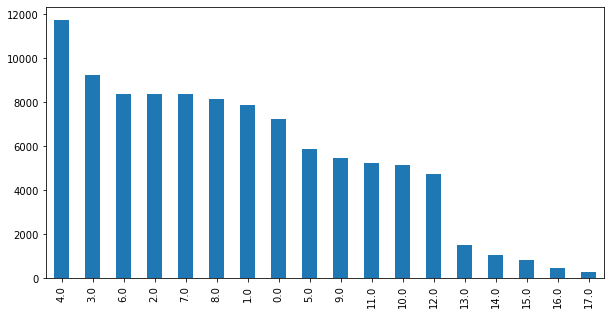

In [128]:
plt.figure(figsize=(10,5))
data['Num_Credit_Inquiries'].value_counts().plot(kind='bar')

<AxesSubplot:>

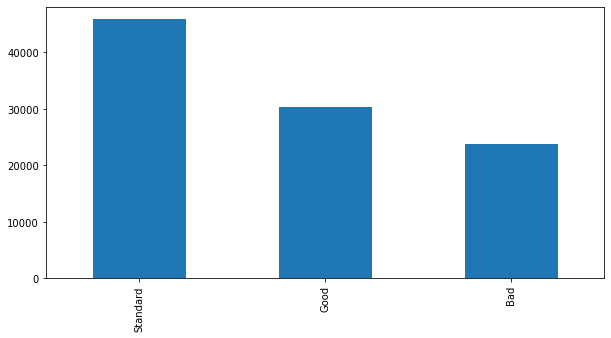

In [129]:
plt.figure(figsize=(10,5))
data['Credit_Mix'].value_counts().plot(kind='bar')

# Label Encodng for Object Dtatype

In [130]:
for col in data.select_dtypes(include='object').columns:
    print(f"{col}: {data[col].unique()}")

Name: ['Aaron Maashoh' 'Rick Rothackerj' 'Langep' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks']
Occupation: ['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']
Type_of_Loan: ['auto loan,credit-builder loan,personal loan,home equity loan'
 'credit-builder loan' 'auto loan,auto loan,not specified' ...
 'home equity loan,auto loan,auto loan,auto loan'
 'payday loan,student loan,mortgage loan,not specified'
 'personal loan,auto loan,mortgage loan,student loan,student loan']
Credit_Mix: ['Good' 'Standard' 'Bad']
Payment_of_Min_Amount: ['No' 'NM' 'Yes']
Payment_Behaviour: ['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' 'High_spent_Large_value_payments']
Credit_Score: ['Good' 'Standard' 'Poor']


In [131]:
from sklearn import preprocessing

# loop over each column in the dataframe where dtypes is object
for col in data.select_dtypes(include=['object']).columns:
    
   # initialize a labelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # fit the encoder to the unique values in the column
    label_encoder.fit(data[col].unique())
    
    #transform the column using the encoder
    data[col] = label_encoder.transform(data[col])
    
    #print the column name and the unique encoder values
    print(f"{col}: {data[col].unique()}")

Name: [  11 7471 4905 ... 1506 7916 6508]
Occupation: [12 13  4  5  2  7 10  3  6  8  0 11  9 14  1]
Type_of_Loan: [ 135  684   42 ... 2103 4843 4921]
Credit_Mix: [1 2 0]
Payment_of_Min_Amount: [1 0 2]
Payment_Behaviour: [2 3 4 5 1 0]
Credit_Score: [0 2 1]


In [132]:
data.dtypes

ID                            int64
Customer_ID                   int64
Month                         int64
Name                          int32
Age                         float64
SSN                         float64
Occupation                    int32
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                  int32
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                    int32
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int32
Amount_invested_monthly     float64
Payment_Behaviour             int32
Monthly_Balance             float64
Credit_Score                  int32
dtype: object

In [133]:
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,4.0,1,809.98,26.822620,265.0,1,24.785217,2,312.494089,0
1,5635,3392,2,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,4.0,1,809.98,31.944960,266.0,1,24.785217,3,284.629162,0
2,5636,3392,3,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,4.0,1,809.98,28.609352,267.0,1,24.785217,4,331.209863,0
3,5637,3392,4,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,4.0,1,809.98,31.377862,268.0,1,24.785217,5,223.451310,0
4,5638,3392,5,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,4.0,1,809.98,24.797347,269.0,1,24.785217,1,341.489231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,6508,25.0,78735990.0,9,39628.99,3359.415833,4.0,...,3.0,1,502.38,34.663572,378.0,1,24.028477,0,479.866228,1
99996,155626,37932,5,6508,25.0,78735990.0,9,39628.99,3359.415833,4.0,...,3.0,1,502.38,40.565631,379.0,1,24.028477,1,496.651610,1
99997,155627,37932,6,6508,25.0,78735990.0,9,39628.99,3359.415833,4.0,...,3.0,1,502.38,41.255522,380.0,1,24.028477,0,516.809083,1
99998,155628,37932,7,6508,25.0,78735990.0,9,39628.99,3359.415833,4.0,...,3.0,1,502.38,33.638208,381.0,1,24.028477,3,319.164979,2


# All of the data are categorical so that means, there are no outliers

<AxesSubplot:>

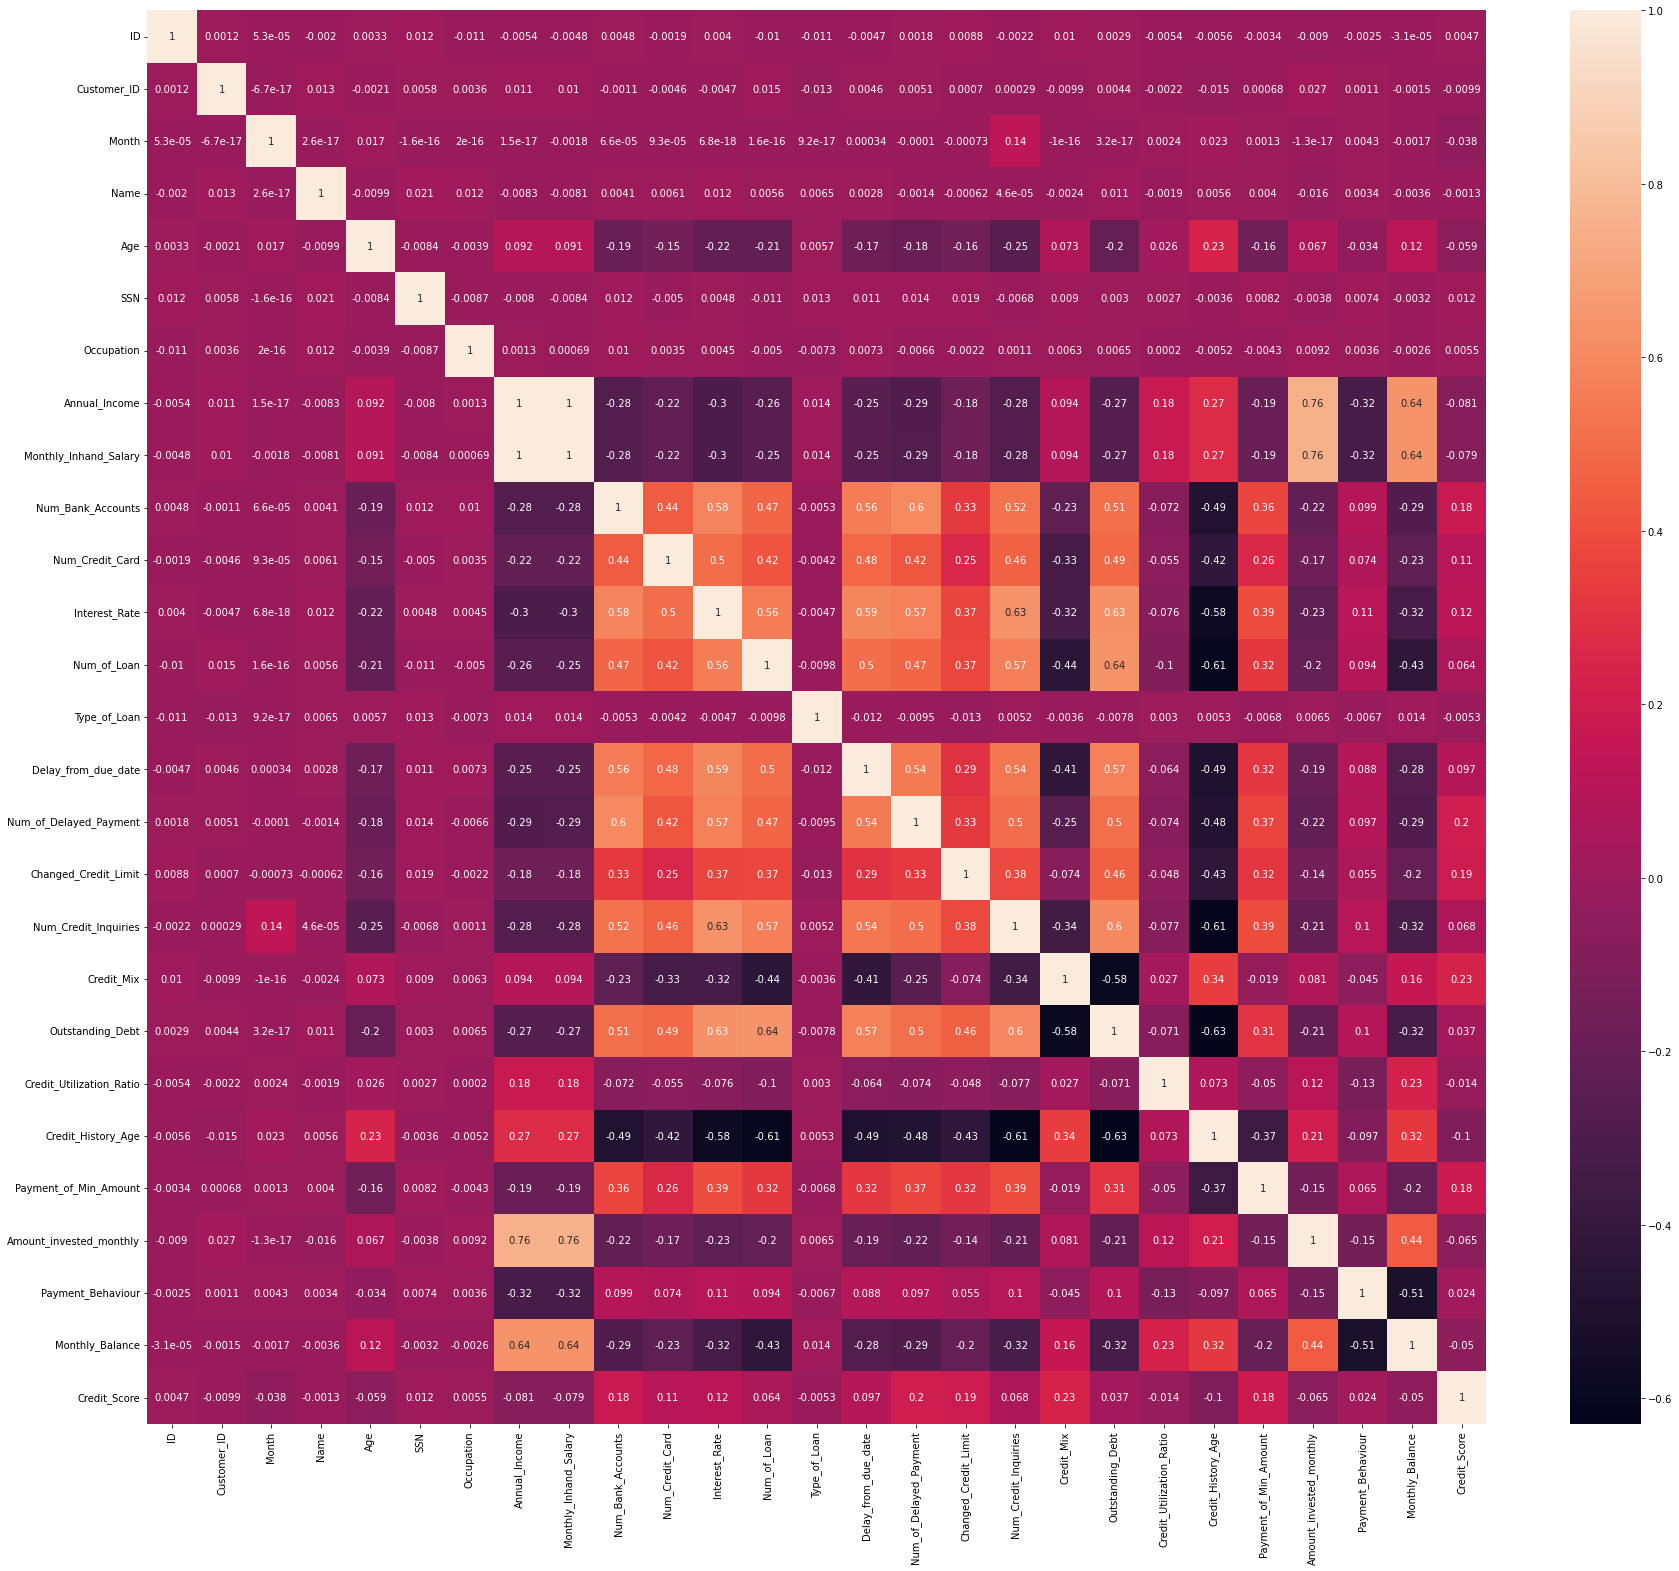

In [134]:
plt.figure(figsize=(30, 26))
sns.heatmap(data.corr(), fmt='.2g', annot=True)

# Train test split

In [135]:
#Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 



In [136]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 26)
(20000, 26)
(80000,)
(20000,)


# Decision Tree 

In [137]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [138]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
  
# loading the iris dataset
iris = datasets.load_iris()
  
# X -> features, y -> label
X = iris.data
y = iris.target
  
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
  
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

  
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  3  6]]


# Naive Bayes

In [139]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
  
# loading the iris dataset
iris = datasets.load_iris()
  
# X -> features, y -> label
X = iris.data
y = iris.target
  
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
  
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
  
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)
print(cm)

1.0
[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


# SVM

In [140]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

  
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
  
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
  
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, y_test)
print(accuracy)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
print(cm)

0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


# KNN

In [141]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


    
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 25)
  
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24).fit(X_train, y_train)
  
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print (accuracy)
  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)
print(cm)

0.9736842105263158
[[11  0  0]
 [ 0 15  1]
 [ 0  0 11]]


In [142]:
#print(metrics.confusion_matrix(y_test,y_pred))
#print(metrics.classification_report(y_test,y_pred, digits=2))


In [143]:
#print(metrics.confusion_matrix(y_true,y_pred))

In [144]:
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,4.0,1,809.98,26.822620,265.0,1,24.785217,2,312.494089,0
1,5635,3392,2,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,4.0,1,809.98,31.944960,266.0,1,24.785217,3,284.629162,0
2,5636,3392,3,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,4.0,1,809.98,28.609352,267.0,1,24.785217,4,331.209863,0
3,5637,3392,4,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,4.0,1,809.98,31.377862,268.0,1,24.785217,5,223.451310,0
4,5638,3392,5,11,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,4.0,1,809.98,24.797347,269.0,1,24.785217,1,341.489231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,6508,25.0,78735990.0,9,39628.99,3359.415833,4.0,...,3.0,1,502.38,34.663572,378.0,1,24.028477,0,479.866228,1
99996,155626,37932,5,6508,25.0,78735990.0,9,39628.99,3359.415833,4.0,...,3.0,1,502.38,40.565631,379.0,1,24.028477,1,496.651610,1
99997,155627,37932,6,6508,25.0,78735990.0,9,39628.99,3359.415833,4.0,...,3.0,1,502.38,41.255522,380.0,1,24.028477,0,516.809083,1
99998,155628,37932,7,6508,25.0,78735990.0,9,39628.99,3359.415833,4.0,...,3.0,1,502.38,33.638208,381.0,1,24.028477,3,319.164979,2


In [145]:
data[['Num_Credit_Card', 'Interest_Rate','Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries','Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date']]

,Num_Credit_Card,Interest_Rate,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Num_of_Loan,Type_of_Loan,Delay_from_due_date
0,4.0,3.0,7.0,11.27,4.0,4.0,135,3.0
1,4.0,3.0,4.0,11.27,4.0,4.0,135,3.0
2,4.0,3.0,7.0,11.27,4.0,4.0,135,3.0
3,4.0,3.0,4.0,6.27,4.0,4.0,135,5.0
4,4.0,3.0,4.0,11.27,4.0,4.0,135,6.0
...,...,...,...,...,...,...,...,...
99995,6.0,7.0,7.0,11.50,3.0,2.0,613,23.0
99996,6.0,7.0,7.0,11.50,3.0,2.0,613,18.0
99997,6.0,7.0,6.0,11.50,3.0,2.0,613,27.0
99998,6.0,7.0,6.0,11.50,3.0,2.0,613,20.0


In [146]:
d={'Credit_Mix':[1],'Outstanding_Debt':[502.38],'Credit_Utilization_Ratio':[40.565631],'Payment_of_Min_Amount':[1]}

In [147]:
d

{'Credit_Mix': [1],
 'Outstanding_Debt': [502.38],
 'Credit_Utilization_Ratio': [40.565631],
 'Payment_of_Min_Amount': [1]}

In [148]:
import pandas as pd
df = pd.DataFrame(d)

In [149]:
df

,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount
0,1,502.38,40.565631,1


In [150]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Credit_Mix                1 non-null      int64  
 1   Outstanding_Debt          1 non-null      float64
 2   Credit_Utilization_Ratio  1 non-null      float64
 3   Payment_of_Min_Amount     1 non-null      int64  
dtypes: float64(2), int64(2)
memory usage: 160.0 bytes


In [151]:
knn.predict(df) 

e:\Users\work\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([0])

In [152]:
import pickle

In [153]:
with open('knn_pickle','wb') as f:
    pickle.dump(knn,f)nn

In [154]:
with open('knn_pickle','rb') as f:
     mp = pickle.load(f)

In [155]:
mp.predict(df)

e:\Users\work\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([0])